In [1]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
#stop photos


# Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\stop photos'

# Create an empty list to store the images
X = []
y = []

# Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image using OpenCV
        try:
            
                img = cv2.imread(os.path.join(path_to_folder, filename))
                resized_img = cv2.resize(img, (224, 224))
                normalized_img = resized_img / 255.0

                # Add the image to the list
                X.append(normalized_img)
                y.append(1)

        
        except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\stop photos'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\stop photos01_stopsign_Stop-Signs-Used-to-Be-Yellow—More-Recently-Than-You-Think_376238113_Usa-Pyon.jpg does not exist


In [37]:
len(X)

435

In [3]:

 # Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\School zone'


    # Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
            
            try:
                    img = cv2.imread(os.path.join(path_to_folder, filename))
                    resized_img = cv2.resize(img, (224, 224))
                    normalized_img = resized_img / 255.0

                        # Add the image to the list
                    X.append(normalized_img)
                    y.append(0)
            except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\School zone'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\School zone.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\School zoneSchool Zone Hours (1600 × 900 px).png does not exist


In [4]:
len(X)

820

In [5]:
y_arr = np.array(y)
X_arr = np.array(X)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(656, 224, 224, 3)

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

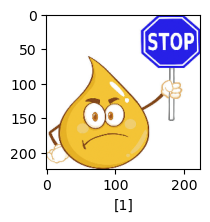

In [11]:
plot_sample(X_test, y_test,5)


# Transfer learning

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.applications import MobileNet

In [6]:
!pip install keras --upgrade

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

OSError: SavedModel file does not exist at: C:\Users\gillp\AppData\Local\Temp\tfhub_modules\426589ad685896ab7954855255a52db3442cb38d\{saved_model.pbtxt|saved_model.pb}

In [7]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

OSError: SavedModel file does not exist at: C:\Users\gillp\AppData\Local\Temp\tfhub_modules\145bb06ec3b59b08fb564ab752bd5aa222bfb50a\{saved_model.pbtxt|saved_model.pb}

In [15]:

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
21/21 [==============================] - 9s 280ms/step - loss: 0.5734 - acc: 0.7119
Epoch 2/5
21/21 [==============================] - 6s 280ms/step - loss: 0.3063 - acc: 0.8720
Epoch 3/5
21/21 [==============================] - 6s 280ms/step - loss: 0.2142 - acc: 0.9162
Epoch 4/5
21/21 [==============================] - 6s 292ms/step - loss: 0.1713 - acc: 0.9375
Epoch 5/5
21/21 [==============================] - 6s 275ms/step - loss: 0.1420 - acc: 0.9527


In [17]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 2s 237ms/step - loss: 0.1763 - acc: 0.9512


[0.17625530064105988, 0.9512194991111755]

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

6/6 [==============================] - 2s 238ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        78
           1       0.94      0.97      0.95        86

    accuracy                           0.95       164
   macro avg       0.95      0.95      0.95       164
weighted avg       0.95      0.95      0.95       164



In [ ]:
import os
from PIL import Image

# Define the directory containing the images to classify
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random'

# Loop over each image in the directory
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
        try:
            
                #count = count+1
                img = cv2.imread(os.path.join(path_to_folder, filename))

                resized_img = cv2.resize(img, (224, 224))
                img_array = np.array(resized_img)
                normalized_img = img_array / 255.0
                img_end = np.expand_dims(normalized_img, axis=0)



                # Classify the image and store the result

                y_pred = model.predict(img_end)
                y_pred_classes = [np.argmax(element) for element in y_pred]

                # Traceback the original filename of the image
                print(y_pred_classes)
                print(f"Original filename: {filename}, Classification result: {y_pred_classes}")
                if(y_pred_classes[0] ==0):

                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")

        except:
                        #d_count = 0        
                
                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")
                


In [52]:
img = plt.imread('4Tb9E44Tg.jpeg')
img = cv2.resize(img, (224, 224))
img = np.array(img)
img = img / 255.0
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Predict the class of the test image
predictions = model.predict(img)
class_index = np.argmax(predictions)
confidence_scores = predictions
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))



if (probabilities[0][0] < 0.6) & (probabilities[0][1] < 0.6 ):
    print("no class")


1/1 [==============================] - 0s 48ms/step
no class


In [50]:
class_index

0

In [51]:
confidence_scores = predictions
# apply softmax function to obtain probabilities
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))

print(probabilities)

[[0.95689756 0.04310243]]


In [41]:
C:\Users\gillp\Downloads\deep learning\traffic sign\code\4Tb9E44Tg.jpeg

numpy.ndarray